Import packages

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Import .csv export file from excel

In [2]:
data = pd.read_csv('Export Skyline SPR108806 ceramides EOS pour boxplot virgule.csv')
data.head()

,Protein Name,SUBJID,Groupe,Area
0,970.9/236,SPR108806_1,J1_NT,33395
1,970.9/236,SPR108806_1,J1_T,18466
2,970.9/236,SPR108806_1,J9_T,23581
3,970.9/236,SPR108806_3,J1_T,37657
4,970.9/236,SPR108806_3,J9_T,5325


Creation of features/variables of interest

In [3]:
data['Project'], data['ID'] = data['SUBJID'].str.split('_', 1).str
data['Day'], data['Condition'] = data['Groupe'].str.split('_', 1).str
data['Sample'] = data['ID'].astype(str) + '-' + data['Condition'] + '-' + data['Day']
data.drop(['Groupe', 'SUBJID','Project','Day','ID'], axis=1, inplace=True)
df = pd.DataFrame(data)

PREVIEW

In [4]:
df.head()

,Protein Name,Area,Condition,Sample
0,970.9/236,33395,NT,1-NT-J1
1,970.9/236,18466,T,1-T-J1
2,970.9/236,23581,T,1-T-J9
3,970.9/236,37657,T,3-T-J1
4,970.9/236,5325,T,3-T-J9


In [5]:
Prot_name = list(df['Protein Name'].unique())
Prot_name

['970.9/236',
 '984.9/236',
 '998.9/236',
 '1012.9/236',
 '1026.9/236',
 '1040.99/236',
 '1055/236',
 '1069/236',
 '1083.03/236',
 '1097/236',
 '970.9/250',
 '984.9/250',
 '998.9/250',
 '1012.9/250',
 '1026.9/250',
 '1055/250',
 '1069/250',
 '1083.03/250',
 '1097/250',
 '970.9/264',
 '984.9/264',
 '998.9/264',
 '1012.9/264',
 '1026.9/264',
 '1040.99/264',
 '1055/264',
 '1069/264',
 '1083.03/264',
 '1097/264',
 '970.9/278',
 '984.9/278',
 '998.9/278',
 '1012.9/278',
 '1026.9/278',
 '1040.99/278',
 '1055/278',
 '1069/278',
 '1083.03/278',
 '1097/278',
 '970.9/292',
 '984.9/292',
 '998.9/292',
 '1012.9/292',
 '1026.9/292',
 '1040.99/292',
 '1055/292',
 '1069/292',
 '1083.03/292',
 '1097/292',
 '970.9/306',
 '984.9/306',
 '998.9/306',
 '1012.9/306',
 '1026.9/306',
 '1040.99/306',
 '1055/306',
 '1069/306',
 '1083.03/306',
 '1097/306',
 '970.9/320',
 '984.9/320',
 '998.9/320',
 '1012.9/320',
 '1026.9/320',
 '1040.99/320',
 '1055/320',
 '1069/320',
 '1083.03/320',
 '1097/320']

In [6]:
dtmp = pd.DataFrame()
for i in range(0,len(Prot_name)):
    dtmp2 = df.loc[df['Protein Name']==Prot_name[i]]
    dtmp2.reset_index(inplace=True, drop=True)
    dtmp = pd.concat([dtmp, dtmp2], axis=1, join_axes=[dtmp2.index])
    
dtmp.to_csv('to_be_cleaned.csv')


In [7]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,970.9/236,984.9/236,998.9/236,1012.9/236,1026.9/236,1040.99/236,1055/236,1069/236,1083.03/236,1097/236,...,998.9/320,1012.9/320,1026.9/320,1040.99/320,1055/320,1069/320,1083.03/320,1097/320,Condition,Sample
0,33395,282334,53159,67800,3072,929,476,268,125,176,...,8224,24557,9449,110241,55444,259484,19814,20647,NT,1-NT-J1
1,18466,105808,21822,31295,2031,1889,388,50,91,85,...,4742,15536,6830,95059,97810,480785,73422,68019,T,1-T-J1
2,23581,137532,33334,36033,3262,1299,340,97,61,52,...,7127,19185,13139,176092,153614,780791,114105,96518,T,1-T-J9
3,37657,315672,75943,141409,7385,6708,507,225,134,103,...,9012,24454,11489,186802,192535,1281147,208947,222498,T,3-T-J1
4,5325,35467,10992,17435,562,991,244,145,113,98,...,1159,5410,2137,34035,43853,272158,50889,51995,T,3-T-J9


In [8]:
label = list(df['Condition'])

In [9]:
df = df.mask(df < 10000) # because limit of quantification LoQ is a peak area of 10000
df.head()

,970.9/236,984.9/236,998.9/236,1012.9/236,1026.9/236,1040.99/236,1055/236,1069/236,1083.03/236,1097/236,...,998.9/320,1012.9/320,1026.9/320,1040.99/320,1055/320,1069/320,1083.03/320,1097/320,Condition,Sample
0,33395.0,282334.0,53159.0,67800.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,24557.0,NaN,110241.0,55444.0,259484.0,19814.0,20647.0,NaN,NaN
1,18466.0,105808.0,21822.0,31295.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,15536.0,NaN,95059.0,97810.0,480785.0,73422.0,68019.0,NaN,NaN
2,23581.0,137532.0,33334.0,36033.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,19185.0,13139.0,176092.0,153614.0,780791.0,114105.0,96518.0,NaN,NaN
3,37657.0,315672.0,75943.0,141409.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,24454.0,11489.0,186802.0,192535.0,1281147.0,208947.0,222498.0,NaN,NaN
4,NaN,35467.0,10992.0,17435.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,34035.0,43853.0,272158.0,50889.0,51995.0,NaN,NaN


In [10]:
df.head()

,970.9/236,984.9/236,998.9/236,1012.9/236,1026.9/236,1040.99/236,1055/236,1069/236,1083.03/236,1097/236,...,998.9/320,1012.9/320,1026.9/320,1040.99/320,1055/320,1069/320,1083.03/320,1097/320,Condition,Sample
0,33395.0,282334.0,53159.0,67800.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,24557.0,NaN,110241.0,55444.0,259484.0,19814.0,20647.0,NaN,NaN
1,18466.0,105808.0,21822.0,31295.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,15536.0,NaN,95059.0,97810.0,480785.0,73422.0,68019.0,NaN,NaN
2,23581.0,137532.0,33334.0,36033.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,19185.0,13139.0,176092.0,153614.0,780791.0,114105.0,96518.0,NaN,NaN
3,37657.0,315672.0,75943.0,141409.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,24454.0,11489.0,186802.0,192535.0,1281147.0,208947.0,222498.0,NaN,NaN
4,NaN,35467.0,10992.0,17435.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,34035.0,43853.0,272158.0,50889.0,51995.0,NaN,NaN


reduction of features

In [11]:
for i in range(0, len(Prot_name)):
    nan_sum = sum(pd.isnull(df[Prot_name[i]]))
    if nan_sum > 95: #70% des données sous le seuil
        df.drop([Prot_name[i]], axis = 1, inplace = True)
    
df.head()

,970.9/236,984.9/236,998.9/236,1012.9/236,970.9/250,984.9/250,998.9/250,1012.9/250,1026.9/250,984.9/264,...,1083.03/306,984.9/320,1012.9/320,1040.99/320,1055/320,1069/320,1083.03/320,1097/320,Condition,Sample
0,33395.0,282334.0,53159.0,67800.0,83555.0,81921.0,566238,73643.0,87694.0,233088.0,...,25677.0,17702.0,24557.0,110241.0,55444.0,259484.0,19814.0,20647.0,NaN,NaN
1,18466.0,105808.0,21822.0,31295.0,54183.0,60636.0,385581,74403.0,80049.0,132987.0,...,58760.0,NaN,15536.0,95059.0,97810.0,480785.0,73422.0,68019.0,NaN,NaN
2,23581.0,137532.0,33334.0,36033.0,65345.0,79259.0,485233,103045.0,113591.0,148364.0,...,80837.0,12407.0,19185.0,176092.0,153614.0,780791.0,114105.0,96518.0,NaN,NaN
3,37657.0,315672.0,75943.0,141409.0,86231.0,108399.0,898872,209987.0,274502.0,204010.0,...,195674.0,16661.0,24454.0,186802.0,192535.0,1281147.0,208947.0,222498.0,NaN,NaN
4,NaN,35467.0,10992.0,17435.0,10094.0,11339.0,113922,24536.0,41584.0,29559.0,...,39172.0,NaN,NaN,34035.0,43853.0,272158.0,50889.0,51995.0,NaN,NaN


In [12]:
df.drop(['Condition', 'Sample'], axis=1, inplace=True)
df.head()

,970.9/236,984.9/236,998.9/236,1012.9/236,970.9/250,984.9/250,998.9/250,1012.9/250,1026.9/250,984.9/264,...,1055/306,1069/306,1083.03/306,984.9/320,1012.9/320,1040.99/320,1055/320,1069/320,1083.03/320,1097/320
0,33395.0,282334.0,53159.0,67800.0,83555.0,81921.0,566238,73643.0,87694.0,233088.0,...,251925,26039.0,25677.0,17702.0,24557.0,110241.0,55444.0,259484.0,19814.0,20647.0
1,18466.0,105808.0,21822.0,31295.0,54183.0,60636.0,385581,74403.0,80049.0,132987.0,...,331281,60679.0,58760.0,NaN,15536.0,95059.0,97810.0,480785.0,73422.0,68019.0
2,23581.0,137532.0,33334.0,36033.0,65345.0,79259.0,485233,103045.0,113591.0,148364.0,...,517664,95548.0,80837.0,12407.0,19185.0,176092.0,153614.0,780791.0,114105.0,96518.0
3,37657.0,315672.0,75943.0,141409.0,86231.0,108399.0,898872,209987.0,274502.0,204010.0,...,867736,151091.0,195674.0,16661.0,24454.0,186802.0,192535.0,1281147.0,208947.0,222498.0
4,NaN,35467.0,10992.0,17435.0,10094.0,11339.0,113922,24536.0,41584.0,29559.0,...,183886,32120.0,39172.0,NaN,NaN,34035.0,43853.0,272158.0,50889.0,51995.0


In [13]:
df.shape

(135, 39)

# IMPUTATION by MEAN

In [14]:
List_transition = list(df.columns)
for i in range(0, len(List_transition)):
    df[List_transition[i]].fillna((df[List_transition[i]].mean()), inplace=True)
    
df.head()

,970.9/236,984.9/236,998.9/236,1012.9/236,970.9/250,984.9/250,998.9/250,1012.9/250,1026.9/250,984.9/264,...,1055/306,1069/306,1083.03/306,984.9/320,1012.9/320,1040.99/320,1055/320,1069/320,1083.03/320,1097/320
0,33395.000000,282334.0,53159.0,67800.0,83555.0,81921.0,566238,73643.0,87694.0,233088.0,...,251925,26039.0,25677.0,17702.000000,24557.000000,110241.0,55444.0,259484.0,19814.0,20647.0
1,18466.000000,105808.0,21822.0,31295.0,54183.0,60636.0,385581,74403.0,80049.0,132987.0,...,331281,60679.0,58760.0,15984.787234,15536.000000,95059.0,97810.0,480785.0,73422.0,68019.0
2,23581.000000,137532.0,33334.0,36033.0,65345.0,79259.0,485233,103045.0,113591.0,148364.0,...,517664,95548.0,80837.0,12407.000000,19185.000000,176092.0,153614.0,780791.0,114105.0,96518.0
3,37657.000000,315672.0,75943.0,141409.0,86231.0,108399.0,898872,209987.0,274502.0,204010.0,...,867736,151091.0,195674.0,16661.000000,24454.000000,186802.0,192535.0,1281147.0,208947.0,222498.0
4,21898.891566,35467.0,10992.0,17435.0,10094.0,11339.0,113922,24536.0,41584.0,29559.0,...,183886,32120.0,39172.0,15984.787234,21400.670455,34035.0,43853.0,272158.0,50889.0,51995.0


For normalization of data

In [15]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.211671,0.382304,0.252832,0.313315,0.326031,0.207739,0.266345,0.168133,0.206820,0.364890,...,0.069023,0.031005,0.029656,0.198364,0.137769,0.131440,0.049079,0.062549,0.000000,0.000000
1,0.073889,0.128446,0.068495,0.114543,0.195674,0.145927,0.177923,0.170144,0.186437,0.198285,...,0.092152,0.101464,0.121048,0.153785,0.051838,0.111532,0.095438,0.125208,0.115652,0.124079
2,0.121096,0.174068,0.136213,0.140342,0.245212,0.200009,0.226697,0.245921,0.275867,0.223878,...,0.146473,0.172389,0.182035,0.060903,0.086597,0.217790,0.156502,0.210151,0.203419,0.198724
3,0.251006,0.430247,0.386857,0.714122,0.337908,0.284632,0.429152,0.528855,0.704888,0.316493,...,0.248502,0.285365,0.499273,0.171340,0.136788,0.231834,0.199091,0.351822,0.408028,0.528696
4,0.105572,0.027290,0.004788,0.039074,0.000000,0.002768,0.044960,0.038212,0.083881,0.026142,...,0.049193,0.043374,0.066936,0.153785,0.107703,0.031512,0.036396,0.066137,0.067040,0.082108


In [16]:
df.shape

(135, 39)

In [17]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2) 
pca.fit(df) 
T = pca.transform(df)

In [18]:
from sklearn.cluster import KMeans  

kmeans_model = KMeans(n_clusters = 5, init = 'random', n_init = 10, max_iter = 50, random_state = 55)  
labels = kmeans_model.fit_predict(T)  

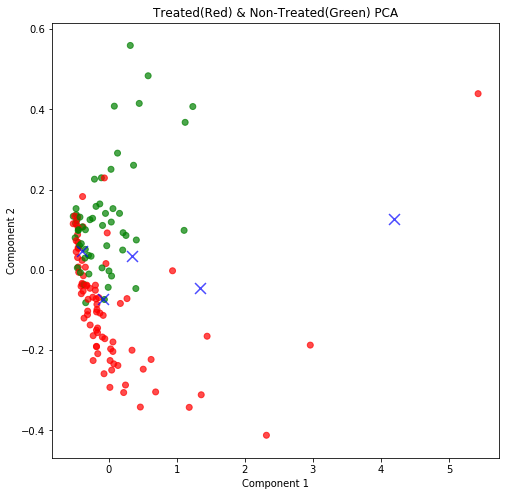

In [19]:
centroids = kmeans_model.cluster_centers_  
fig = plt.figure(figsize=(8,8)) 

ax = fig.add_subplot(111) 
color = []
for l in label: 
    if l=='T': 
        color = color + ['red'] 
    else: 
        color = color + ['green']

        ax.set_title('Treated(Red) & Non-Treated(Green) PCA')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.scatter(T[:,0], T[:,1], color=color, alpha=0.7)
ax.scatter(x = centroids[:,0], y = centroids[:,1], marker='x', c='blue', alpha=0.7, linewidths=3, s = 120) 
plt.show()

# MODELISATION

# DecisionTreeClassifier

In [20]:
from sklearn.cross_validation import train_test_split 
X = df
y = label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = None) 

C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(random_state=0) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))
print(y_pred)
confusion_Tree = confusion_matrix(y_test, y_pred)
confusion_Tree = pd.DataFrame(confusion_Tree, columns=['T', 'NT'], index=['T', 'NT'])
confusion_Tree

0.8518518518518519
['T' 'T' 'T' 'T' 'T' 'T' 'NT' 'T' 'NT' 'T' 'T' 'NT' 'T' 'NT' 'T' 'T' 'T'
 'NT' 'T' 'T' 'T' 'NT' 'T' 'NT' 'T' 'T' 'T']


,T,NT
T,6,3
NT,1,17


In [22]:
model.score(X_test,y_test)

0.8518518518518519

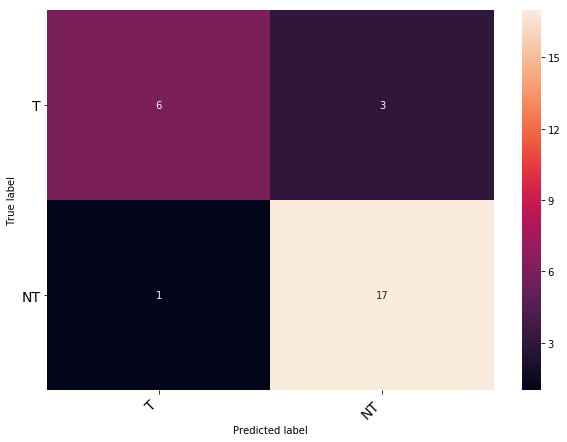

In [23]:
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
    confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names = ['T', 'NT']
print_confusion_matrix(confusion_Tree, class_names)

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# K-neighbors Classifier

0.9629629629629629
['NT' 'T' 'T' 'T' 'T' 'NT' 'NT' 'T' 'T' 'T' 'T' 'NT' 'T' 'NT' 'T' 'T' 'NT'
 'NT' 'T' 'T' 'T' 'NT' 'T' 'NT' 'NT' 'T' 'T']
    T  NT
T   9   0
NT  1  17
Score = 0.9629629629629629


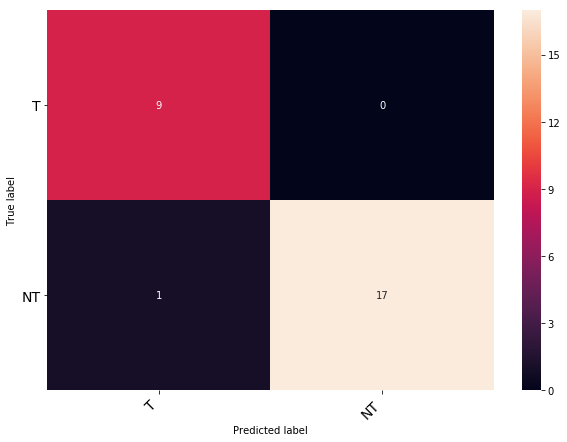

In [25]:



model = KNeighborsClassifier(n_neighbors=5) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))
print(y_pred)
confusion_knn = confusion_matrix(y_test, y_pred)
confusion_knn = pd.DataFrame(confusion_knn, columns=['T', 'NT'], index=['T', 'NT'])
print(confusion_knn)
score = model.score(X_test,y_test)
print('Score = {}'.format(score))

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
    confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names = ['T', 'NT']
print_confusion_matrix(confusion_knn, class_names)

# SVC

0.6666666666666666
['T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T'
 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T']
    T  NT
T   0   9
NT  0  18
Score = 0.6666666666666666


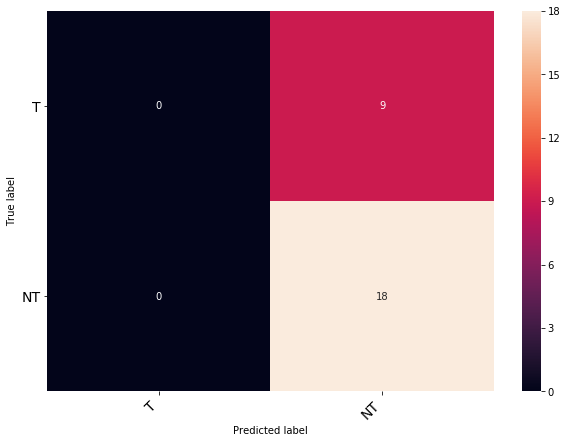

In [26]:
model = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))
print(y_pred)
confusion_SVC = confusion_matrix(y_test, y_pred)
confusion_SVC = pd.DataFrame(confusion_SVC, columns=['T', 'NT'], index=['T', 'NT'])
print(confusion_SVC)
score = model.score(X_test,y_test)
print('Score = {}'.format(score))

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
    confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names = ['T', 'NT']
print_confusion_matrix(confusion_SVC, class_names)

# RandomForestClassifier

0.8888888888888888
['NT' 'NT' 'T' 'T' 'T' 'NT' 'NT' 'T' 'NT' 'T' 'T' 'NT' 'T' 'NT' 'T' 'T'
 'NT' 'NT' 'T' 'T' 'T' 'NT' 'T' 'NT' 'NT' 'T' 'T']
    T  NT
T   9   0
NT  3  15
Score = 0.8888888888888888


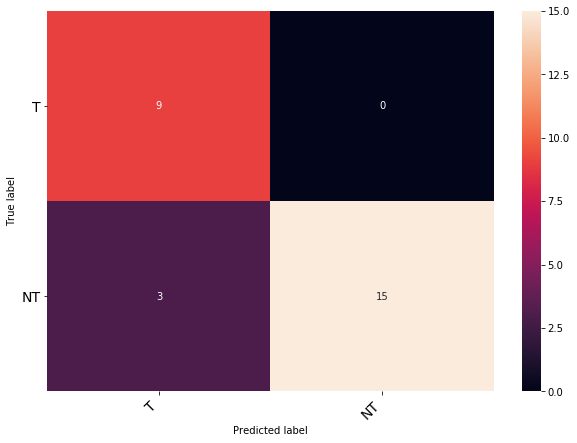

In [27]:
model = RandomForestClassifier() 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))
print(y_pred)
confusion_forest = confusion_matrix(y_test, y_pred)
confusion_forest = pd.DataFrame(confusion_forest, columns=['T', 'NT'], index=['T', 'NT'])
print(confusion_forest)
score = model.score(X_test,y_test)
print('Score = {}'.format(score))

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
    confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names = ['T', 'NT']
print_confusion_matrix(confusion_forest, class_names)

# MLP Classifier

5000 layers instead of 100, solver 'lbfgs' works better than adam...check overfitting

0.9629629629629629
['NT' 'NT' 'T' 'T' 'T' 'NT' 'NT' 'T' 'T' 'T' 'T' 'NT' 'T' 'NT' 'T' 'T'
 'NT' 'NT' 'T' 'T' 'T' 'NT' 'T' 'NT' 'T' 'T' 'T']
    T  NT
T   9   0
NT  1  17
Score = 0.9629629629629629


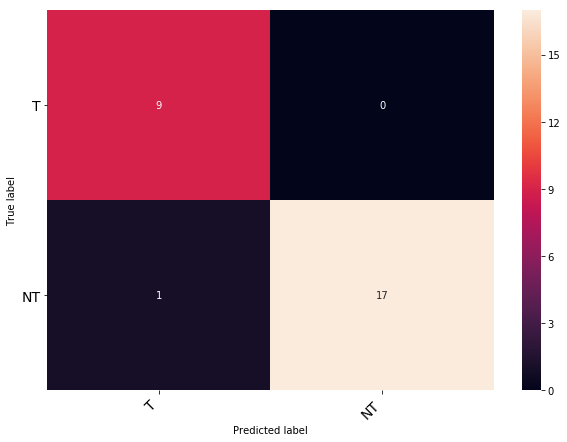

In [28]:

model = MLPClassifier(hidden_layer_sizes=(5000, ), activation='relu', solver='lbfgs', alpha=0.0001, batch_size='auto', 
                      learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
                      random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                      early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))
print(y_pred)
confusion_MLP = confusion_matrix(y_test, y_pred)
confusion_MLP = pd.DataFrame(confusion_MLP, columns=['T', 'NT'], index=['T', 'NT'])
print(confusion_MLP)
score = model.score(X_test,y_test)
print('Score = {}'.format(score))

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
    confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names = ['T', 'NT']
print_confusion_matrix(confusion_MLP, class_names)

In [53]:
score_Tree = []
score_knn = []
score_Tree = []
score_SVC = []
score_Random = []
score_MLP = []

for i in range(0,100):
    X = df
    y = label
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = None)
    
    model = DecisionTreeClassifier(random_state=0) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_Tree = score_Tree + [model.score(X_test, y_test)]
    
    model = KNeighborsClassifier(n_neighbors=5) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_knn = score_knn + [model.score(X_test, y_test)]
    
    model = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_SVC = score_SVC + [model.score(X_test, y_test)]
    
    model = RandomForestClassifier() 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_Random = score_Random + [model.score(X_test, y_test)]
    
    model = MLPClassifier(hidden_layer_sizes=(5000, ), activation='relu', solver='lbfgs', alpha=0.0001, batch_size='auto', 
                      learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
                      random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                      early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_MLP = score_MLP + [model.score(X_test, y_test)]
    
    index_lab = [i]

score_Tree = pd.DataFrame(score_Tree)
score_knn = pd.DataFrame(score_knn)
score_MLP = pd.DataFrame(score_MLP)
score_Random = pd.DataFrame(score_Random)
score_SVC = pd.DataFrame(score_SVC)

score_knn.head()

    

,0
0,0.888889
1,0.814815
2,0.851852
3,0.888889
4,0.962963


In [30]:
score_tab = pd.concat([score_knn, score_MLP, score_Random, score_SVC, score_Tree], axis=1, join_axes=[score_knn.index])

In [31]:
score_tab.columns = ['KNN', 'MLP', 'RANDOM', 'SVC', 'TREE']

In [32]:
score_tab.head()

,KNN,MLP,RANDOM,SVC,TREE
0,1.000000,1.000000,0.888889,0.703704,0.851852
1,0.925926,0.888889,0.888889,0.481481,0.814815
2,0.925926,1.000000,0.925926,0.518519,0.888889
3,0.888889,0.851852,0.814815,0.555556,0.629630
4,0.962963,0.962963,0.777778,0.777778,0.888889


In [33]:
score_mean = [score_tab.KNN.mean(), score_tab.MLP.mean(), score_tab.RANDOM.mean(), score_tab.SVC.mean(), score_tab.TREE.mean()]
score_median = [score_tab.KNN.median(), score_tab.MLP.median(), score_tab.RANDOM.median(), score_tab.SVC.median(), score_tab.TREE.mean()]
score_std = [score_tab.KNN.std(), score_tab.MLP.std(), score_tab.RANDOM.std(), score_tab.SVC.std(), score_tab.TREE.std()]

In [34]:
model_label = ['KNN', 'MLP', 'Random Forest', 'SVC', 'Decision Tree']
score_mean = pd.DataFrame(score_mean, index = model_label)
score_mean.columns = ['Mean Score']
score_mean['Std Dev'] = score_std
score_mean['Median'] = score_median

In [35]:
score_mean

,Mean Score,Std Dev,Median
KNN,0.888519,0.056082,0.888889
MLP,0.914074,0.055181,0.925926
Random Forest,0.848889,0.076409,0.851852
SVC,0.621481,0.086912,0.629630
Decision Tree,0.817037,0.079457,0.817037


In [36]:
score_tab.describe()

,KNN,MLP,RANDOM,SVC,TREE
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.888519,0.914074,0.848889,0.621481,0.817037
std,0.056082,0.055181,0.076409,0.086912,0.079457
min,0.740741,0.740741,0.629630,0.407407,0.629630
25%,0.851852,0.888889,0.814815,0.555556,0.777778
50%,0.888889,0.925926,0.851852,0.629630,0.814815
75%,0.925926,0.962963,0.888889,0.666667,0.888889
max,1.000000,1.000000,1.000000,0.777778,0.962963
